In [3]:
import numpy as np
import pandas as pd
# Import machine learning methods
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

import plotly.express as px

from sklearn.metrics import auc, roc_curve, RocCurveDisplay, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_fscore_support


from sklearn.metrics import precision_score, recall_score


In [4]:
np.random.seed(42)

In [5]:
download_required = False

if download_required:

    # Download processed data:
    address = 'https://raw.githubusercontent.com/MichaelAllen1966/' + \
                '1804_python_healthcare/master/titanic/data/processed_data.csv'

    data = pd.read_csv(address)

    # Create a data subfolder if one does not already exist
    import os
    data_directory ='../datasets/'
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)

    # Save data
    data.to_csv(data_directory + 'processed_titanic_data.csv', index=False)

In [6]:
data = pd.read_csv('../datasets/processed_titanic_data.csv')
# Make all data 'float' type
data = data.astype(float)

In [7]:
data.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeImputed,EmbarkedImputed,CabinLetterImputed,...,Embarked_missing,CabinLetter_A,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_missing
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6.0,0.0,3.0,28.0,0.0,0.0,8.4583,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,7.0,0.0,1.0,54.0,0.0,0.0,51.8625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,8.0,0.0,3.0,2.0,3.0,1.0,21.0750,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,9.0,1.0,3.0,27.0,0.0,2.0,11.1333,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10.0,1.0,2.0,14.0,1.0,0.0,30.0708,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeImputed,EmbarkedImputed,CabinLetterImputed,...,Embarked_missing,CabinLetter_A,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_missing
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.198653,0.002245,0.771044,...,0.002245,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.399210,0.047351,0.420397,...,0.047351,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Drop Passengerid (axis=1 indicates we are removing a column rather than a row)
# We drop passenger ID as it is not original data
# inplace=True means change the dataframe itself - don't create a copy with this column dropped

data.drop('PassengerId', inplace=True, axis=1)

## Divide into X (features) and y (labels)

In [10]:
X = data.drop('Survived',axis=1) # X = all 'data' except the 'survived' column
y = data['Survived'] # y = 'survived' column from 'data'

## Divide into training and tets sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Fit decision tree model

In [12]:
model = DecisionTreeClassifier() # Create a Decision Tree Model
model = model.fit(X_train,y_train) # Fit the model using our training data

## Predict values

In [13]:
# Predict training and test set labels
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## Calculate accuracy

In [14]:
# The shorthand below says to check each predicted y value against the actual
# y value in the training data.  This gives a list of True and False values
# for each prediction, where True indicates the predicted value matches the
# actual value.  Then we take the mean of these Boolean values, which gives
# us a proportion (where if all values were True, the proportion would be 1.0)
# If you want to see why that works, just uncomment the following line of code
# to see what y_pred_train == y_train is doing.
# print (y_pred_train == y_train)
accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)

print (f'Accuracy of predicting training data = {accuracy_train:3f}')
print (f'Accuracy of predicting test data = {accuracy_test:3f}')

Accuracy of predicting training data = 0.983533
Accuracy of predicting test data = 0.766816


In [15]:
# Show first ten predicted classes
classes = model.predict(X_test)
classes[0:10]

array([0., 1., 0., 1., 1., 1., 1., 0., 0., 1.])

In [16]:
# Show first ten predicted probabilities
probabilities = model.predict_proba(X_test)
probabilities[0:10]

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.16666667, 0.83333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ]])

## Plot tree

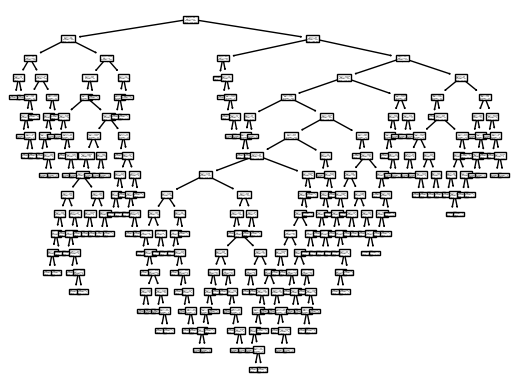

In [17]:
fig = plot_tree(model)

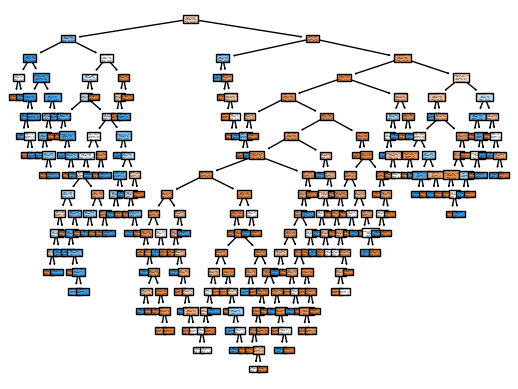

In [18]:
fig = plot_tree(
    model,
    feature_names=data.drop('Survived',axis=1).columns.tolist(),
    class_names=['Died', 'Survived'],
    filled=True
    )

## Following Nodes

https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

# Tweaking DT Parameters

In [19]:
def train_and_run_dt(model):
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)

    print (f'Accuracy of predicting training data = {accuracy_train:.3f}')
    print (f'Accuracy of predicting test data = {accuracy_test:.3f}')

    print (f'Precision on test data = {precision_score(y_test, y_pred_test, average='micro'):.3f}')
    print (f'Recall on test data = {recall_score(y_test, y_pred_test, average='micro'):.3f}')

In [ ]:
recall_score(y_test, y_pred_test, average='micro')

In [20]:
train_and_run_dt(model = DecisionTreeClassifier())

Accuracy of predicting training data = 0.984
Accuracy of predicting test data = 0.753
Precision on test data = 0.753
Recall on test data = 0.753


### Min Samples Leaf

In [ ]:
train_and_run_dt(model = DecisionTreeClassifier(min_samples_leaf=5))


Accuracy of predicting training data = 0.883234
Accuracy of predicting test data = 0.829596


In [ ]:
accuracy_results = []

for i in range(1, 15, 1):
    model = DecisionTreeClassifier(min_samples_leaf=i)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)
    accuracy_results.append({'accuracy_train': accuracy_train, 'accuracy_test': accuracy_test, 'min_samples_leaf': i})

px.line(pd.DataFrame(accuracy_results).melt(id_vars='min_samples_leaf'),
        x='min_samples_leaf', y='value', color='variable')

#### Min Samples Split

In [ ]:
train_and_run_dt(model = DecisionTreeClassifier(min_samples_split=5))


Accuracy of predicting training data = 0.9431137724550899
Accuracy of predicting test data = 0.7623318385650224


In [ ]:
accuracy_results = []

for i in range(2, 15, 1):
    model = DecisionTreeClassifier(min_samples_split=i)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)
    accuracy_results.append({'accuracy_train': accuracy_train, 'accuracy_test': accuracy_test, 'min_samples_split': i})

px.line(pd.DataFrame(accuracy_results).melt(id_vars='min_samples_split'),
        x='min_samples_split', y='value', color='variable')

In [ ]:
train_and_run_dt(model = DecisionTreeClassifier())

Accuracy of predicting training data = 0.984
Accuracy of predicting test data = 0.767


In [ ]:
train_and_run_dt(model = DecisionTreeClassifier(max_depth=5))


Accuracy of predicting training data = 0.859
Accuracy of predicting test data = 0.803


In [ ]:
train_and_run_dt(model = DecisionTreeClassifier(max_depth=3))

Accuracy of predicting training data = 0.832
Accuracy of predicting test data = 0.803


In [ ]:
train_and_run_dt(model = DecisionTreeClassifier(max_depth=7))

Accuracy of predicting training data = 0.891
Accuracy of predicting test data = 0.803


In [ ]:
accuracy_results = []

for i in range(1, 15, 1):
    model = model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)
    accuracy_results.append({'accuracy_train': accuracy_train, 'accuracy_test': accuracy_test, 'max_depth': i})

px.line(pd.DataFrame(accuracy_results).melt(id_vars='max_depth'),
        x='max_depth', y='value', color='variable')

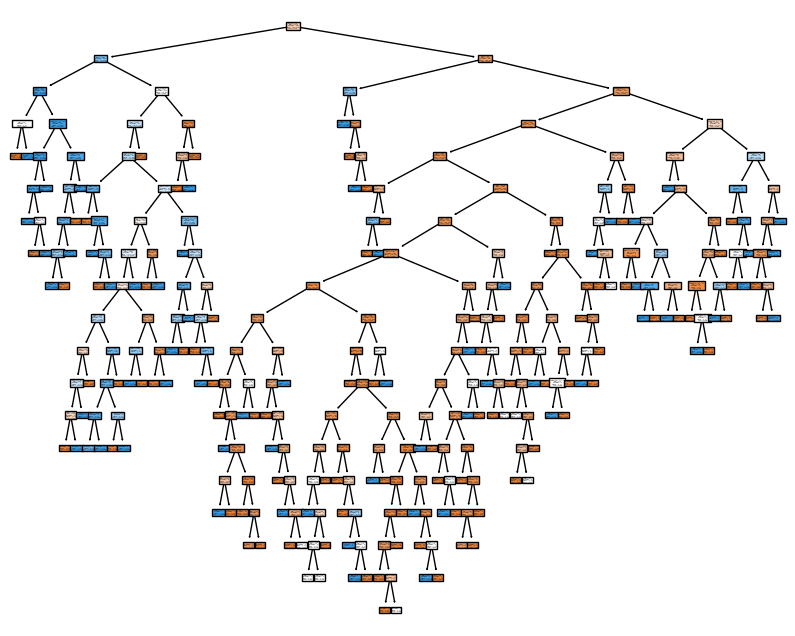

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
tree_plot = plot_tree(model,
    feature_names=data.drop('Survived',axis=1).columns.tolist(),
    class_names=['Died', 'Survived'],
    filled=True,
    ax=ax
    )

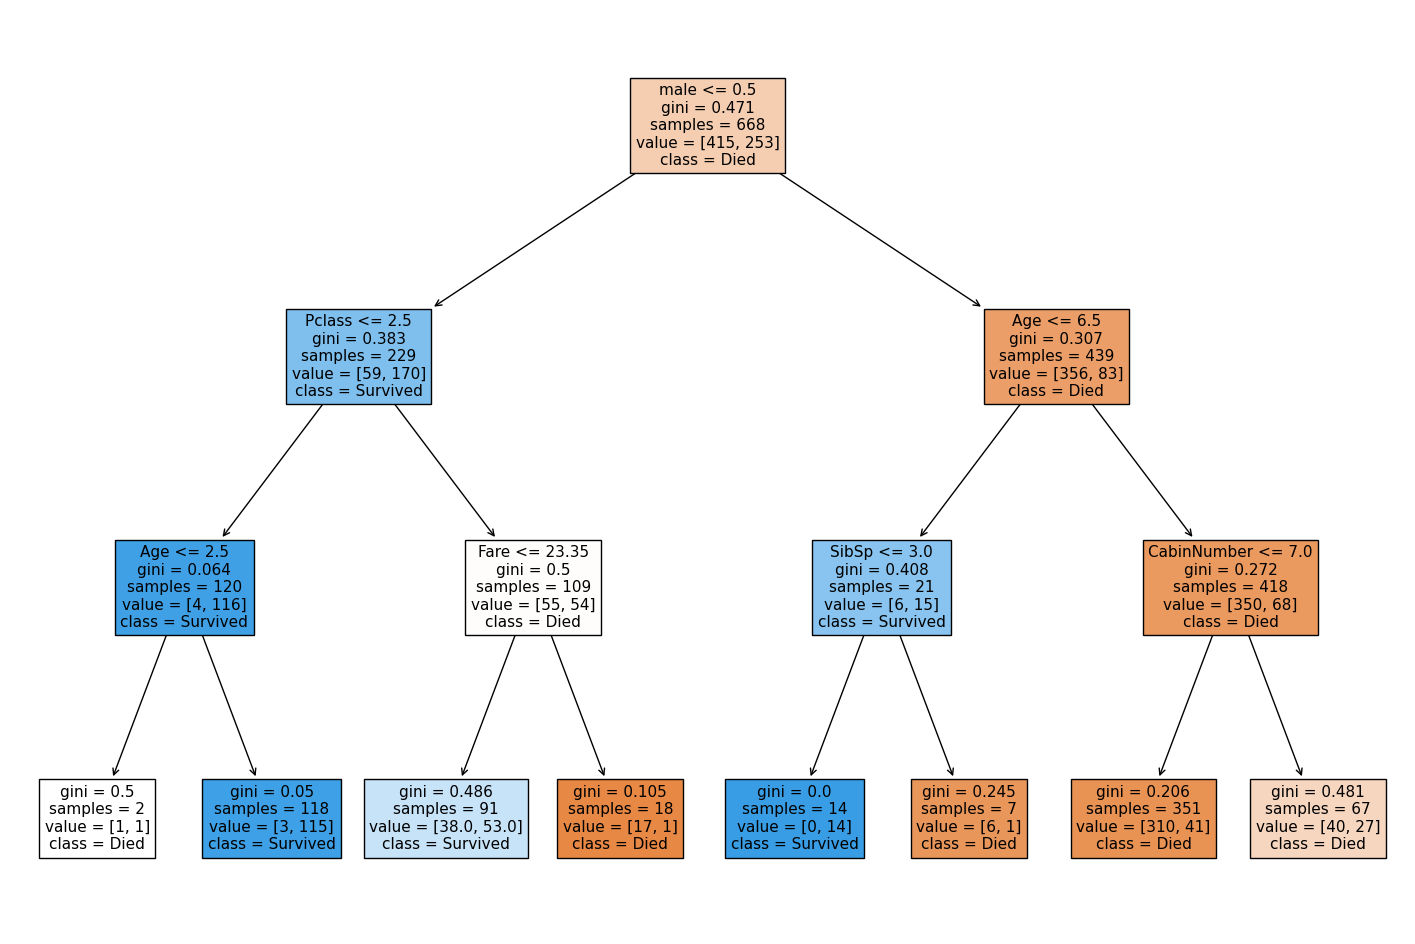

In [ ]:
fig, ax = plt.subplots(figsize=(18,12))

model = DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train, y_train)
tree_plot = plot_tree(model,
    feature_names=data.drop('Survived',axis=1).columns.tolist(),
    class_names=['Died', 'Survived'],
    filled=True,
    ax=ax,
    fontsize=11
    )

# Compare with our log reg

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
def standardise_data(X_train, X_test):

    # Initialise a new scaling object for normalising input data
    sc = StandardScaler()

    # Apply the scaler to the training and test sets
    train_std=sc.fit_transform(X_train)
    test_std=sc.fit_transform(X_test)

    return train_std, test_std

In [ ]:
X_train_standardised, X_test_standardised = standardise_data(X_train, X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_standardised,y_train)

LogisticRegression()

In [ ]:
# Predict training and test set labels
y_pred_train = model.predict(X_train_standardised)
y_pred_test = model.predict(X_test_standardised)

In [ ]:
# The shorthand below says to check each predicted y value against the actual
# y value in the training data.  This gives a list of True and False values
# for each prediction, where True indicates the predicted value matches the
# actual value.  Then we take the mean of these Boolean values, which gives
# us a proportion (where if all values were True, the proportion would be 1.0)
# If you want to see why that works, just uncomment the following line of code
# to see what y_pred_train == y_train is doing.
# print (y_pred_train == y_train)
accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)

print (f'Accuracy of predicting training data = {accuracy_train}')
print (f'Accuracy of predicting test data = {accuracy_test}')

Accuracy of predicting training data = 0.8083832335329342
Accuracy of predicting test data = 0.8116591928251121


Best train accuracy seen in DT: 0.823
Train accuracy seen in LR: 0.805

Best test accuracy seen in DT: 0.820
Test accuracy seen in LR: 0.798

## Post pruning

https://ranvir.xyz/blog/practical-approach-to-tree-pruning-using-sklearn/

https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'total impurity of leaves')

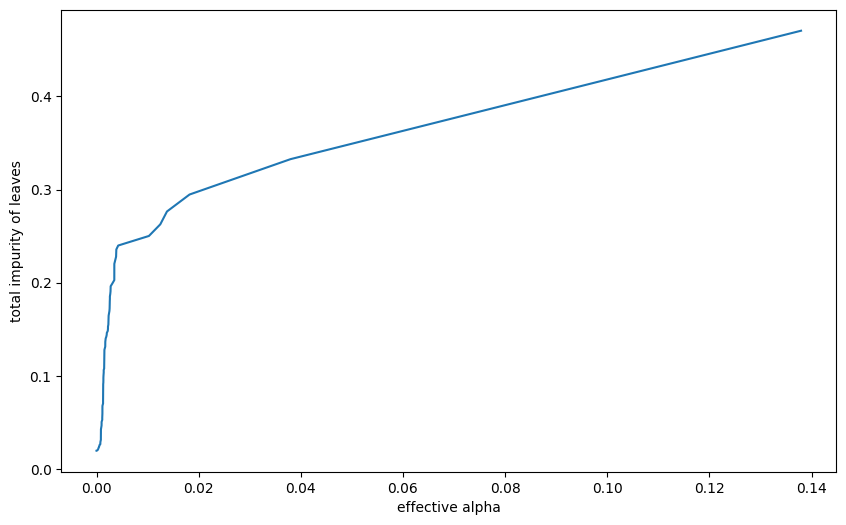

In [ ]:
model = DecisionTreeClassifier()
path = model.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")


In [ ]:
models = []

for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    models.append(model)


Text(0, 0.5, 'total depth')

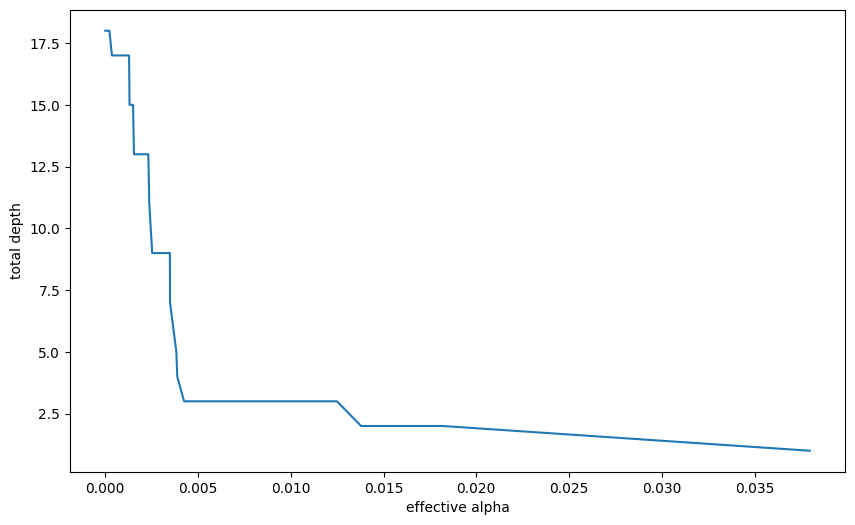

In [ ]:
tree_depths = [model.tree_.max_depth for model in models]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")


Text(0, 0.5, 'Accuracy scores')

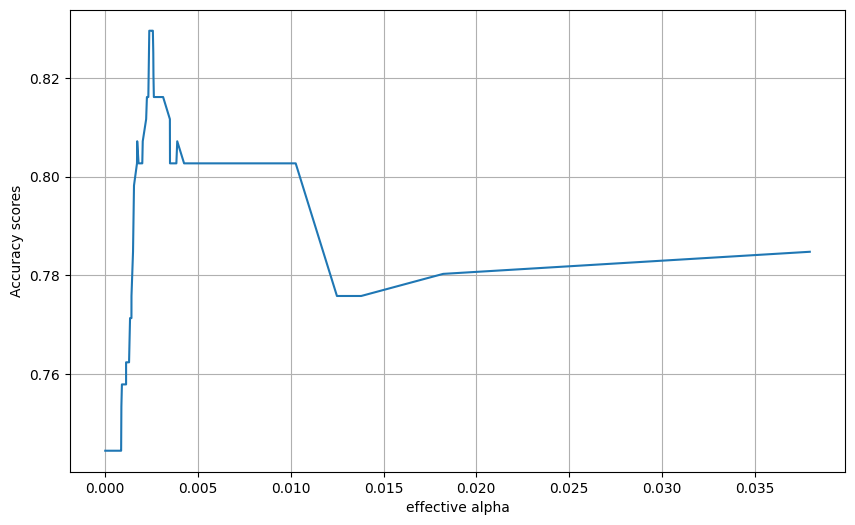

In [ ]:
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_test, model.predict(X_test)) for model in models]

tree_depths = [model.tree_.max_depth for model in models]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")


Final model from this approach

In [ ]:
train_and_run_dt(DecisionTreeClassifier(random_state=0, ccp_alpha=0.0045))

Accuracy of predicting training data = 0.8323353293413174
Accuracy of predicting test data = 0.8026905829596412


## Exploring metrics in our lr and dt 

### Decision Tree

In [ ]:
decision_tree_model = model = DecisionTreeClassifier(max_depth=6)
decision_tree_model = decision_tree_model.fit(X_train,y_train)
y_pred_train_dt = decision_tree_model.predict(X_train)
y_pred_test_dt = decision_tree_model.predict(X_test)

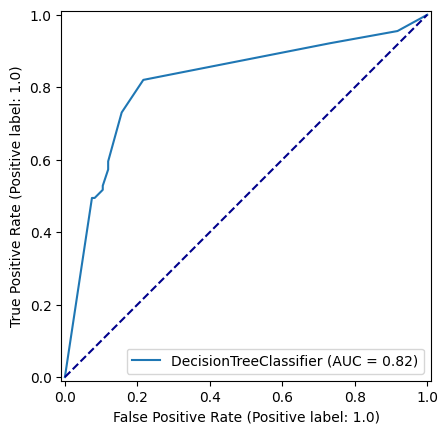

In [ ]:
roc_curve = RocCurveDisplay.from_estimator(
    decision_tree_model, X_test, y_test
)

fig = roc_curve.figure_
ax = roc_curve.ax_


ax.plot([0, 1], [0, 1], color='darkblue', linestyle='--')


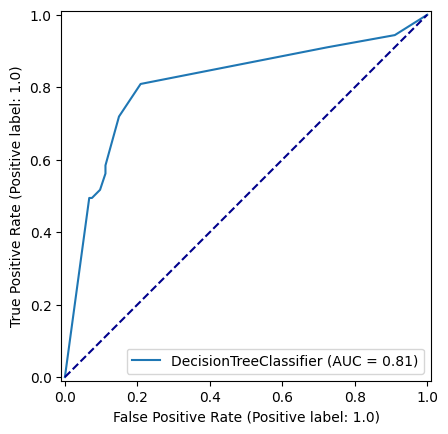

In [ ]:
np.random.seed(42)

decision_tree_model = DecisionTreeClassifier(max_depth=6)
decision_tree_model = decision_tree_model.fit(X_train,y_train)

y_pred_train_dt = decision_tree_model.predict(X_train)
y_pred_test_dt = decision_tree_model.predict(X_test)

roc_curve_dt = RocCurveDisplay.from_estimator(
    decision_tree_model, X_test, y_test
)

fig = roc_curve_dt.figure_
ax = roc_curve_dt.ax_

ax.plot([0, 1], [0, 1], color='darkblue', linestyle='--')


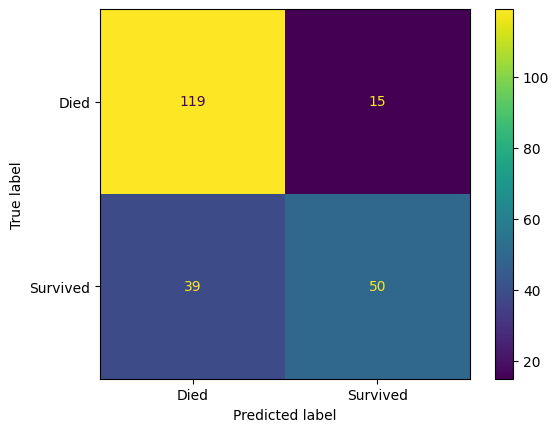

In [ ]:
confusion_matrix_dt = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test_dt
        ),
        display_labels=["Died", "Survived"]
)

confusion_matrix_dt.plot()

plt.show()

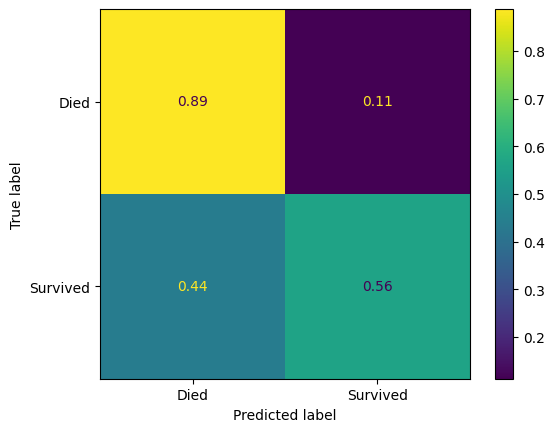

In [ ]:
confusion_matrix_dt_normalised = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test_dt,
        normalize='true'
        ),
        display_labels=["Died", "Survived"]
)

confusion_matrix_dt_normalised.plot()

plt.show()

In [ ]:
pd.DataFrame(precision_recall_fscore_support(
        y_true=y_test,
        y_pred=y_pred_test_dt,
        average="binary"
        ))

,0
0,0.769231
1,0.561798
2,0.649351
3,NaN


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

def standardise_data(X_train, X_test):

    # Initialise a new scaling object for normalising input data
    sc = StandardScaler()

    # Apply the scaler to the training and test sets
    train_std=sc.fit_transform(X_train)
    test_std=sc.fit_transform(X_test)

    return train_std, test_std

X_train_standardised, X_test_standardised = standardise_data(X_train, X_test)

logistic_regression_model = LogisticRegression()
logistic_regression_model = logistic_regression_model.fit(X_train_standardised,y_train)

y_pred_train_lr = logistic_regression_model.predict(X_train_standardised)
y_pred_test_lr = logistic_regression_model.predict(X_test_standardised)

accuracy_train = np.mean(y_pred_train_lr == y_train)
accuracy_test = np.mean(y_pred_test_lr == y_test)

print (f'Accuracy of predicting training data = {accuracy_train}')
print (f'Accuracy of predicting test data = {accuracy_test}')


Accuracy of predicting training data = 0.8083832335329342
Accuracy of predicting test data = 0.8116591928251121


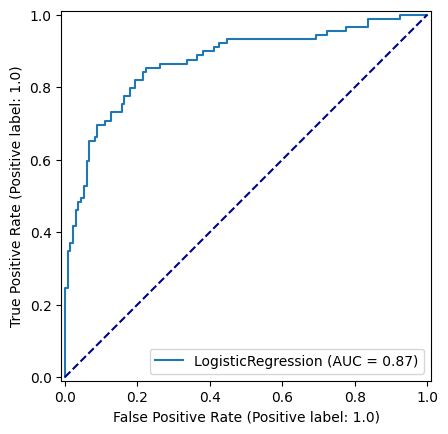

In [ ]:
roc_curve_lr = RocCurveDisplay.from_estimator(
    logistic_regression_model, X_test_standardised, y_test
)

fig = roc_curve_lr.figure_
ax = roc_curve_lr.ax_

ax.plot([0, 1], [0, 1], color='darkblue', linestyle='--')


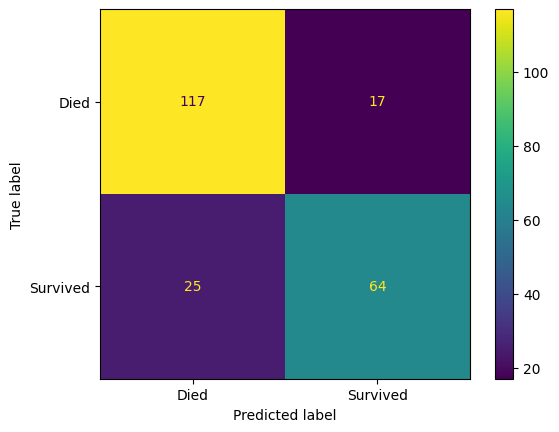

In [ ]:
confusion_matrix_lr = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test_lr,
        ),
        display_labels=["Died", "Survived"]
)

confusion_matrix_lr.plot()

plt.show()

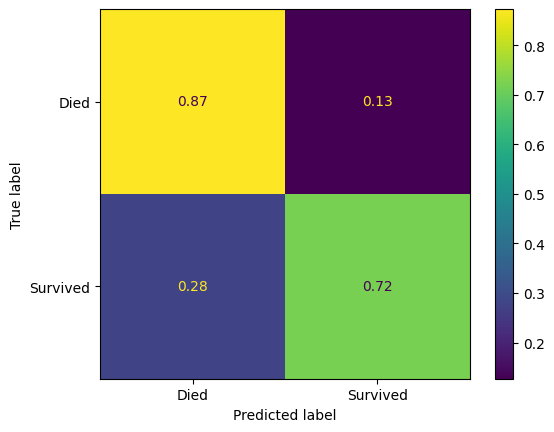

In [ ]:
confusion_matrix_lr_normalised = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test_lr,
        normalize='true',
        ),
        display_labels=["Died", "Survived"]
)

confusion_matrix_lr_normalised.plot()

plt.show()

In [ ]:
pd.DataFrame(classification_report(
        y_true=y_test,
        y_pred=y_pred_test_lr,
        target_names=["Died", "Survived"],
        output_dict=True
))

,Died,Survived,accuracy,macro avg,weighted avg
precision,0.823944,0.790123,0.811659,0.807034,0.810446
recall,0.873134,0.719101,0.811659,0.796118,0.811659
f1-score,0.847826,0.752941,0.811659,0.800384,0.809957
support,134.000000,89.000000,0.811659,223.000000,223.000000


In [ ]:
precision, recall, fbeta, support = precision_recall_fscore_support(
        y_true=y_test,
        y_pred=y_pred_test_lr,
        average="binary"
        )

## Compare confusion matrices

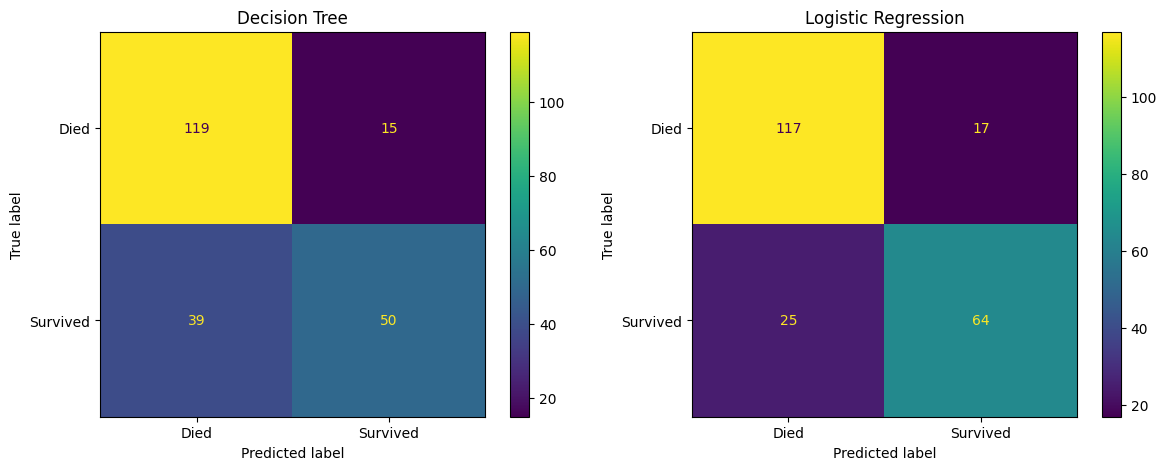

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
confusion_matrix_dt.plot(ax=ax1)
ax1.title.set_text('Decision Tree')

confusion_matrix_lr.plot(ax=ax2)
ax2.title.set_text('Logistic Regression')

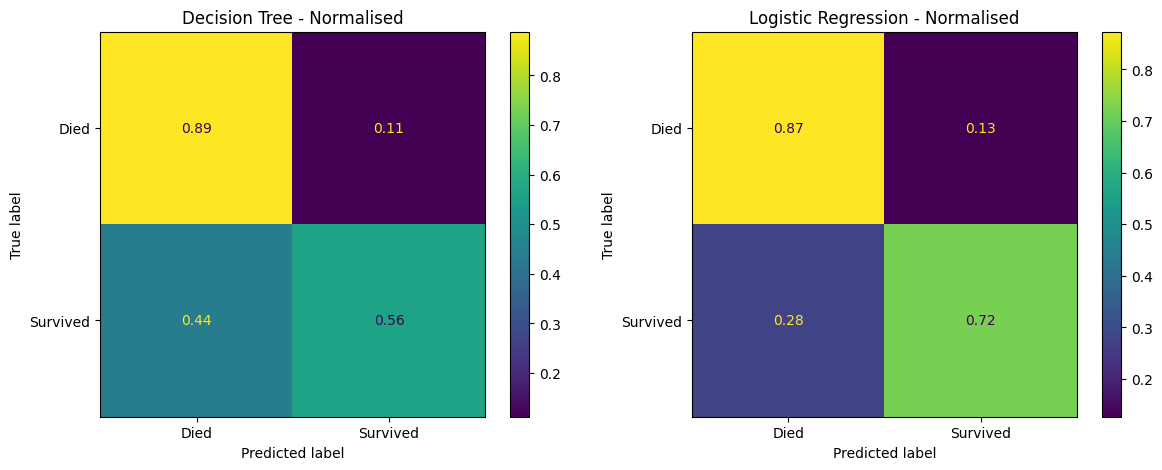

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
confusion_matrix_dt_normalised.plot(ax=ax1)
ax1.title.set_text('Decision Tree - Normalised')

confusion_matrix_lr_normalised.plot(ax=ax2)
ax2.title.set_text('Logistic Regression - Normalised')

# Compare ROC Curves

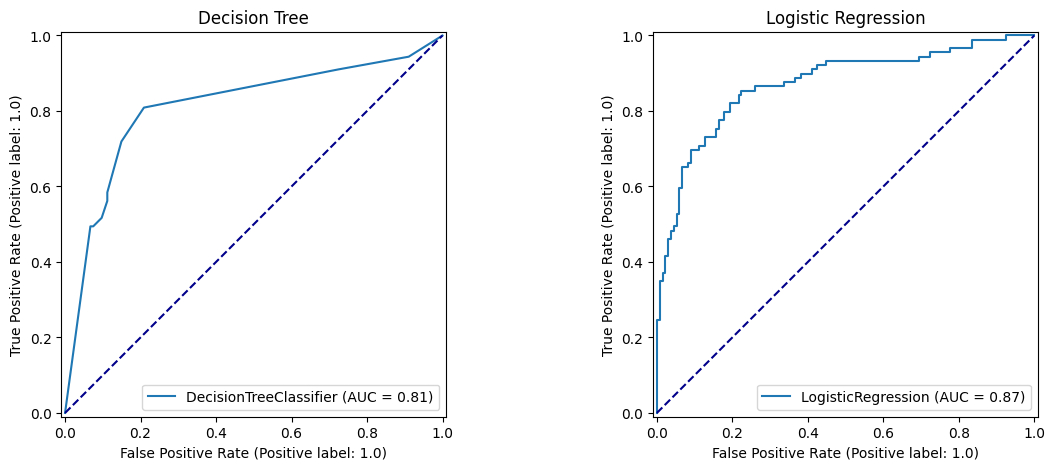

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
roc_curve_dt.plot(ax=ax1)
ax1.title.set_text('Decision Tree')
ax1.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

roc_curve_lr.plot(ax=ax2)
ax2.title.set_text('Logistic Regression')
ax2.plot([0, 1], [0, 1], color='darkblue', linestyle='--')